In [ ]:
from backend.viz.clickmap import run_click_gui
run_click_gui("./masks/from_nb.json", H=128, W=128,
              bg_path=None, bg_channel=0,
              vmax=None, vmin=None, max_points=10)


# 数据预处理+Dataloader

In [8]:
# h5
import yaml
import backend.dataio as _
from backend.dataio.api import run
cfg = yaml.safe_load(open("examples/data_configs/h5_sparse.yaml","r"))
dataset, dls, summary = run(cfg)

In [ ]:
# mat
import yaml
import backend.dataio as _
from backend.dataio.api import run
cfg = yaml.safe_load(open("examples/data_configs/mat_full.yaml","r"))
dataset, dls, summary = run(cfg)

In [1]:
# nc
import yaml
import backend.dataio as _
from backend.dataio.api import run
cfg = yaml.safe_load(open("examples/data_configs/nc_full.yaml","r"))
dataset, dls, summary = run(cfg)

dataset.array5d: shape=[1,1501,80,640,3], dtype=float32
#samples: 1501; has transforms: True
channels: ['u', 'v', 'omega']
[split] total samples: 1501
  - train:   1200  (79.9%)
  - val  :    150  (10.0%)
  - test :    151  (10.1%)

[visualize] 使用 split='train' 进行可视化
[sizecheck] 跳过：No module named 'backend.viz.sizecheck'
[batch 0] x.shape=[12, 3, 80, 640] -> BCHW
[batch 0] y.shape=[12, 1, 80, 640] -> BCHW
[batch 0] cond.shape=[12, 1, 80, 640] -> BCHW


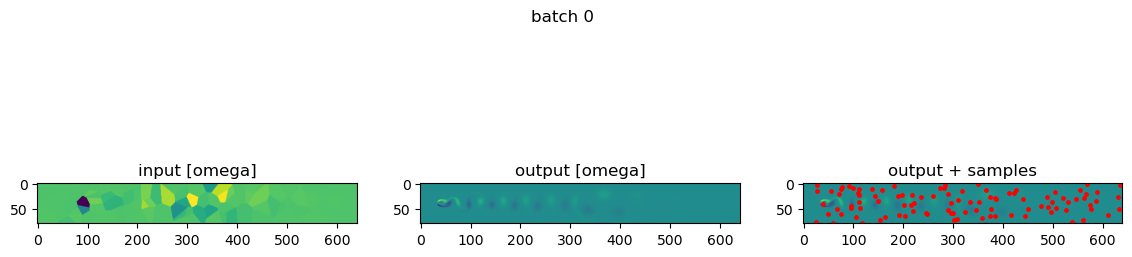

[batch 1] x.shape=[12, 3, 80, 640] -> BCHW
[batch 1] y.shape=[12, 1, 80, 640] -> BCHW
[batch 1] cond.shape=[12, 1, 80, 640] -> BCHW


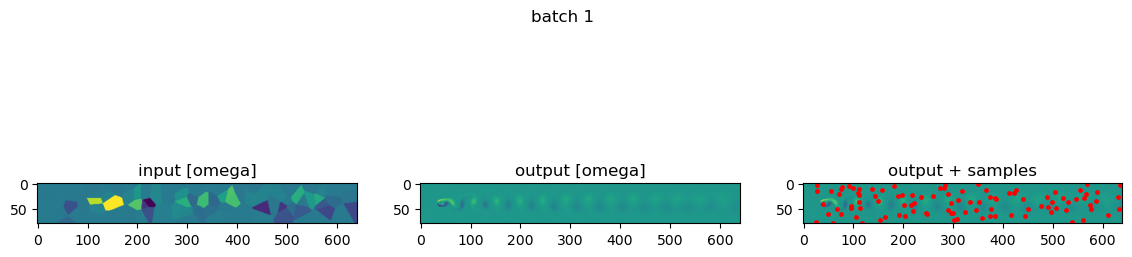

In [2]:
from backend.viz.data_inspect import one_click_check
one_click_check(dataset, dls, channel="omega", n_batches=2)

In [ ]:
dls

# 训练单元

In [ ]:
# Smoke Test
import yaml
cfg = yaml.safe_load(open("examples/train_configs/epd_smoketest_unet.yaml", "r"))

train_dl = dls['train']
val_dl   = dls['val']
test_dl  = dls['test']
dataloaders = (train_dl, val_dl, test_dl)

from backend.train.smoke.pipeline import run_smoke
model, artefacts = run_smoke(cfg, train_dl, val_dl, test_dl)
artefacts


In [3]:
# Full Test
import yaml
cfg = yaml.safe_load(open("examples/train_configs/train_vit_base_nc.yaml", "r"))

# train_dl = dls['train']
# val_dl   = dls['val']
# test_dl  = dls['test']

from backend.train.runner import run_training
# model, artefacts = run_training(cfg, train_dl, val_dl, test_dl)
model, artefacts = run_training(cfg)
artefacts


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name       | Type          | Params | Mode 
-----------------------------------------------------
0 | encoder    | ViTEncoder    | 0      | train
1 | propagator | ViTPropagator | 499 K  | train
2 | decoder    | ViTDecoder    | 1.0 M  | train
3 | head       | _PixelHead    | 33     | train
-----------------------------------------------------
1.5 M     Trainable params
0         Non-trainable params
1.

Epoch 0: 100%|██████████| 38/38 [00:03<00:00, 12.48it/s, v_num=1636, train_loss_step=0.822, train_total_step=0.822, val_loss_step=1.140, val_total_step=1.140, val_loss_epoch=1.030, val_total_epoch=1.030, train_loss_epoch=1.050, train_total_epoch=1.050]

Metric val_total improved. New best score: 1.026


Epoch 1: 100%|██████████| 38/38 [00:02<00:00, 13.10it/s, v_num=1636, train_loss_step=0.775, train_total_step=0.775, val_loss_step=1.090, val_total_step=1.090, val_loss_epoch=0.978, val_total_epoch=0.978, train_loss_epoch=0.874, train_total_epoch=0.874]

Metric val_total improved by 0.048 >= min_delta = 0.0. New best score: 0.978


Epoch 2: 100%|██████████| 38/38 [00:02<00:00, 13.16it/s, v_num=1636, train_loss_step=0.669, train_total_step=0.669, val_loss_step=0.903, val_total_step=0.903, val_loss_epoch=0.807, val_total_epoch=0.807, train_loss_epoch=0.797, train_total_epoch=0.797]

Metric val_total improved by 0.170 >= min_delta = 0.0. New best score: 0.807


Epoch 3: 100%|██████████| 38/38 [00:02<00:00, 13.18it/s, v_num=1636, train_loss_step=0.534, train_total_step=0.534, val_loss_step=0.777, val_total_step=0.777, val_loss_epoch=0.706, val_total_epoch=0.706, train_loss_epoch=0.659, train_total_epoch=0.659]

Metric val_total improved by 0.101 >= min_delta = 0.0. New best score: 0.706


Epoch 4: 100%|██████████| 38/38 [00:02<00:00, 12.72it/s, v_num=1636, train_loss_step=0.492, train_total_step=0.492, val_loss_step=0.727, val_total_step=0.727, val_loss_epoch=0.670, val_total_epoch=0.670, train_loss_epoch=0.599, train_total_epoch=0.599]

Metric val_total improved by 0.037 >= min_delta = 0.0. New best score: 0.670


Epoch 5: 100%|██████████| 38/38 [00:02<00:00, 13.62it/s, v_num=1636, train_loss_step=0.396, train_total_step=0.396, val_loss_step=0.655, val_total_step=0.655, val_loss_epoch=0.591, val_total_epoch=0.591, train_loss_epoch=0.535, train_total_epoch=0.535]

Metric val_total improved by 0.079 >= min_delta = 0.0. New best score: 0.591


Epoch 6: 100%|██████████| 38/38 [00:02<00:00, 14.04it/s, v_num=1636, train_loss_step=0.350, train_total_step=0.350, val_loss_step=0.569, val_total_step=0.569, val_loss_epoch=0.517, val_total_epoch=0.517, train_loss_epoch=0.444, train_total_epoch=0.444]

Metric val_total improved by 0.074 >= min_delta = 0.0. New best score: 0.517


Epoch 7: 100%|██████████| 38/38 [00:02<00:00, 14.07it/s, v_num=1636, train_loss_step=0.318, train_total_step=0.318, val_loss_step=0.526, val_total_step=0.526, val_loss_epoch=0.482, val_total_epoch=0.482, train_loss_epoch=0.404, train_total_epoch=0.404]

Metric val_total improved by 0.035 >= min_delta = 0.0. New best score: 0.482


Epoch 8: 100%|██████████| 38/38 [00:02<00:00, 13.92it/s, v_num=1636, train_loss_step=0.294, train_total_step=0.294, val_loss_step=0.478, val_total_step=0.478, val_loss_epoch=0.447, val_total_epoch=0.447, train_loss_epoch=0.375, train_total_epoch=0.375]

Metric val_total improved by 0.035 >= min_delta = 0.0. New best score: 0.447


Epoch 9: 100%|██████████| 38/38 [00:02<00:00, 13.92it/s, v_num=1636, train_loss_step=0.263, train_total_step=0.263, val_loss_step=0.432, val_total_step=0.432, val_loss_epoch=0.408, val_total_epoch=0.408, train_loss_epoch=0.342, train_total_epoch=0.342]

Metric val_total improved by 0.039 >= min_delta = 0.0. New best score: 0.408


Epoch 10: 100%|██████████| 38/38 [00:02<00:00, 13.69it/s, v_num=1636, train_loss_step=0.246, train_total_step=0.246, val_loss_step=0.401, val_total_step=0.401, val_loss_epoch=0.377, val_total_epoch=0.377, train_loss_epoch=0.313, train_total_epoch=0.313]

Metric val_total improved by 0.030 >= min_delta = 0.0. New best score: 0.377


Epoch 11: 100%|██████████| 38/38 [00:02<00:00, 13.90it/s, v_num=1636, train_loss_step=0.236, train_total_step=0.236, val_loss_step=0.383, val_total_step=0.383, val_loss_epoch=0.357, val_total_epoch=0.357, train_loss_epoch=0.293, train_total_epoch=0.293]

Metric val_total improved by 0.021 >= min_delta = 0.0. New best score: 0.357


Epoch 12: 100%|██████████| 38/38 [00:02<00:00, 13.86it/s, v_num=1636, train_loss_step=0.218, train_total_step=0.218, val_loss_step=0.369, val_total_step=0.369, val_loss_epoch=0.340, val_total_epoch=0.340, train_loss_epoch=0.275, train_total_epoch=0.275]

Metric val_total improved by 0.017 >= min_delta = 0.0. New best score: 0.340


Epoch 13: 100%|██████████| 38/38 [00:02<00:00, 13.77it/s, v_num=1636, train_loss_step=0.209, train_total_step=0.209, val_loss_step=0.357, val_total_step=0.357, val_loss_epoch=0.327, val_total_epoch=0.327, train_loss_epoch=0.260, train_total_epoch=0.260]

Metric val_total improved by 0.013 >= min_delta = 0.0. New best score: 0.327


Epoch 14: 100%|██████████| 38/38 [00:02<00:00, 13.90it/s, v_num=1636, train_loss_step=0.200, train_total_step=0.200, val_loss_step=0.341, val_total_step=0.341, val_loss_epoch=0.310, val_total_epoch=0.310, train_loss_epoch=0.247, train_total_epoch=0.247]

Metric val_total improved by 0.017 >= min_delta = 0.0. New best score: 0.310


Epoch 15: 100%|██████████| 38/38 [00:02<00:00, 13.80it/s, v_num=1636, train_loss_step=0.187, train_total_step=0.187, val_loss_step=0.330, val_total_step=0.330, val_loss_epoch=0.297, val_total_epoch=0.297, train_loss_epoch=0.233, train_total_epoch=0.233]

Metric val_total improved by 0.012 >= min_delta = 0.0. New best score: 0.297


Epoch 16: 100%|██████████| 38/38 [00:02<00:00, 13.62it/s, v_num=1636, train_loss_step=0.180, train_total_step=0.180, val_loss_step=0.310, val_total_step=0.310, val_loss_epoch=0.278, val_total_epoch=0.278, train_loss_epoch=0.221, train_total_epoch=0.221]

Metric val_total improved by 0.019 >= min_delta = 0.0. New best score: 0.278


Epoch 17: 100%|██████████| 38/38 [00:02<00:00, 13.81it/s, v_num=1636, train_loss_step=0.171, train_total_step=0.171, val_loss_step=0.295, val_total_step=0.295, val_loss_epoch=0.265, val_total_epoch=0.265, train_loss_epoch=0.211, train_total_epoch=0.211]

Metric val_total improved by 0.013 >= min_delta = 0.0. New best score: 0.265


Epoch 18: 100%|██████████| 38/38 [00:02<00:00, 13.67it/s, v_num=1636, train_loss_step=0.166, train_total_step=0.166, val_loss_step=0.284, val_total_step=0.284, val_loss_epoch=0.254, val_total_epoch=0.254, train_loss_epoch=0.200, train_total_epoch=0.200]

Metric val_total improved by 0.011 >= min_delta = 0.0. New best score: 0.254


Epoch 19: 100%|██████████| 38/38 [00:02<00:00, 13.63it/s, v_num=1636, train_loss_step=0.155, train_total_step=0.155, val_loss_step=0.273, val_total_step=0.273, val_loss_epoch=0.243, val_total_epoch=0.243, train_loss_epoch=0.190, train_total_epoch=0.190]

Metric val_total improved by 0.012 >= min_delta = 0.0. New best score: 0.243


Epoch 20: 100%|██████████| 38/38 [00:02<00:00, 13.61it/s, v_num=1636, train_loss_step=0.154, train_total_step=0.154, val_loss_step=0.265, val_total_step=0.265, val_loss_epoch=0.235, val_total_epoch=0.235, train_loss_epoch=0.181, train_total_epoch=0.181]

Metric val_total improved by 0.007 >= min_delta = 0.0. New best score: 0.235


Epoch 21: 100%|██████████| 38/38 [00:02<00:00, 13.60it/s, v_num=1636, train_loss_step=0.144, train_total_step=0.144, val_loss_step=0.256, val_total_step=0.256, val_loss_epoch=0.227, val_total_epoch=0.227, train_loss_epoch=0.173, train_total_epoch=0.173]

Metric val_total improved by 0.009 >= min_delta = 0.0. New best score: 0.227


Epoch 22: 100%|██████████| 38/38 [00:02<00:00, 13.71it/s, v_num=1636, train_loss_step=0.141, train_total_step=0.141, val_loss_step=0.247, val_total_step=0.247, val_loss_epoch=0.219, val_total_epoch=0.219, train_loss_epoch=0.167, train_total_epoch=0.167]

Metric val_total improved by 0.008 >= min_delta = 0.0. New best score: 0.219


Epoch 23: 100%|██████████| 38/38 [00:02<00:00, 13.85it/s, v_num=1636, train_loss_step=0.134, train_total_step=0.134, val_loss_step=0.237, val_total_step=0.237, val_loss_epoch=0.209, val_total_epoch=0.209, train_loss_epoch=0.159, train_total_epoch=0.159]

Metric val_total improved by 0.010 >= min_delta = 0.0. New best score: 0.209


Epoch 24: 100%|██████████| 38/38 [00:02<00:00, 13.24it/s, v_num=1636, train_loss_step=0.127, train_total_step=0.127, val_loss_step=0.228, val_total_step=0.228, val_loss_epoch=0.201, val_total_epoch=0.201, train_loss_epoch=0.152, train_total_epoch=0.152]

Metric val_total improved by 0.008 >= min_delta = 0.0. New best score: 0.201


Epoch 25: 100%|██████████| 38/38 [00:02<00:00, 13.84it/s, v_num=1636, train_loss_step=0.124, train_total_step=0.124, val_loss_step=0.220, val_total_step=0.220, val_loss_epoch=0.194, val_total_epoch=0.194, train_loss_epoch=0.147, train_total_epoch=0.147]

Metric val_total improved by 0.007 >= min_delta = 0.0. New best score: 0.194


Epoch 26: 100%|██████████| 38/38 [00:02<00:00, 13.72it/s, v_num=1636, train_loss_step=0.119, train_total_step=0.119, val_loss_step=0.215, val_total_step=0.215, val_loss_epoch=0.189, val_total_epoch=0.189, train_loss_epoch=0.141, train_total_epoch=0.141]

Metric val_total improved by 0.005 >= min_delta = 0.0. New best score: 0.189


Epoch 27: 100%|██████████| 38/38 [00:02<00:00, 13.82it/s, v_num=1636, train_loss_step=0.117, train_total_step=0.117, val_loss_step=0.210, val_total_step=0.210, val_loss_epoch=0.185, val_total_epoch=0.185, train_loss_epoch=0.137, train_total_epoch=0.137]

Metric val_total improved by 0.004 >= min_delta = 0.0. New best score: 0.185


Epoch 28: 100%|██████████| 38/38 [00:02<00:00, 13.77it/s, v_num=1636, train_loss_step=0.113, train_total_step=0.113, val_loss_step=0.204, val_total_step=0.204, val_loss_epoch=0.178, val_total_epoch=0.178, train_loss_epoch=0.134, train_total_epoch=0.134]

Metric val_total improved by 0.006 >= min_delta = 0.0. New best score: 0.178


Epoch 29: 100%|██████████| 38/38 [00:02<00:00, 13.76it/s, v_num=1636, train_loss_step=0.108, train_total_step=0.108, val_loss_step=0.197, val_total_step=0.197, val_loss_epoch=0.173, val_total_epoch=0.173, train_loss_epoch=0.130, train_total_epoch=0.130]

Metric val_total improved by 0.006 >= min_delta = 0.0. New best score: 0.173


Epoch 30: 100%|██████████| 38/38 [00:02<00:00, 13.60it/s, v_num=1636, train_loss_step=0.106, train_total_step=0.106, val_loss_step=0.193, val_total_step=0.193, val_loss_epoch=0.168, val_total_epoch=0.168, train_loss_epoch=0.125, train_total_epoch=0.125]

Metric val_total improved by 0.004 >= min_delta = 0.0. New best score: 0.168


Epoch 31:  58%|█████▊    | 22/38 [00:01<00:01, 14.51it/s, v_num=1636, train_loss_step=0.124, train_total_step=0.124, val_loss_step=0.193, val_total_step=0.193, val_loss_epoch=0.168, val_total_epoch=0.168, train_loss_epoch=0.122, train_total_epoch=0.122]  

`Trainer.fit` stopped: `max_steps=1200` reached.


Epoch 31:  58%|█████▊    | 22/38 [00:01<00:01, 13.21it/s, v_num=1636, train_loss_step=0.124, train_total_step=0.124, val_loss_step=0.193, val_total_step=0.193, val_loss_epoch=0.168, val_total_epoch=0.168, train_loss_epoch=0.122, train_total_epoch=0.122]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing DataLoader 0: 100%|██████████| 5/5 [00:00<00:00, 34.32it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_loss_epoch      │    0.3056235909461975     │
│     test_total_epoch      │    0.3056235909461975     │
└───────────────────────────┴───────────────────────────┘

{'run_dir': 'runs/vit_base_epd_nc/20251014_151636',
 'best_checkpoint': '/home/wyr/projects/Sana/runs/vit_base_epd_nc/20251014_151636/checkpoints/030-0.1685.ckpt',
 'config': 'runs/vit_base_epd_nc/20251014_151636/config.dump.yaml',
 'eval_log': 'runs/vit_base_epd_nc/20251014_151636/eval_log.jsonl',
 'eval_vis': 'runs/vit_base_epd_nc/20251014_151636/eval_vis'}